### Анализ тональности текстов

### Загрузка данных и пакетов

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
print(df.shape)
df.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Вывод случайных значений и обзор датафрейма

In [77]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
22415,26214,71166,lahore,25-03-2020,Mask and sanitizer companies after #coronaviru...,Neutral
9795,13594,58546,North East of England,20-03-2020,Sashaying elegantly around a supermarket today...,Neutral
4613,8412,53364,NaN,18-03-2020,With shortages in the supermarket and or self ...,Positive
15648,19447,64399,"Wales, UK",22-03-2020,#COVID?19 #coronavirus #SocialDistancing take ...,Extremely Negative
12831,16630,61582,London and Sussex,21-03-2020,Take away the supermarket trolleys only basket...,Neutral
39045,42844,87796,United Kingdom,12-04-2020,The Independent on 1 5 million Brits go hungry...,Extremely Negative
10498,14297,59249,Pennsyltucky,20-03-2020,Don't want to say I'm an introvert but I had t...,Neutral
29226,33025,77977,"Newcastle-under-Lyme, England",05-04-2020,Outside for the first time in 2 weeks-\r\r\n- ...,Neutral
9221,13020,57972,NaN,20-03-2020,IÂm a little disappointed at the fact it took...,Negative
2027,5826,50778,"Oklahoma City, OK",17-03-2020,"All IÂve got to say, is grocery store clerks ...",Negative


In [78]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

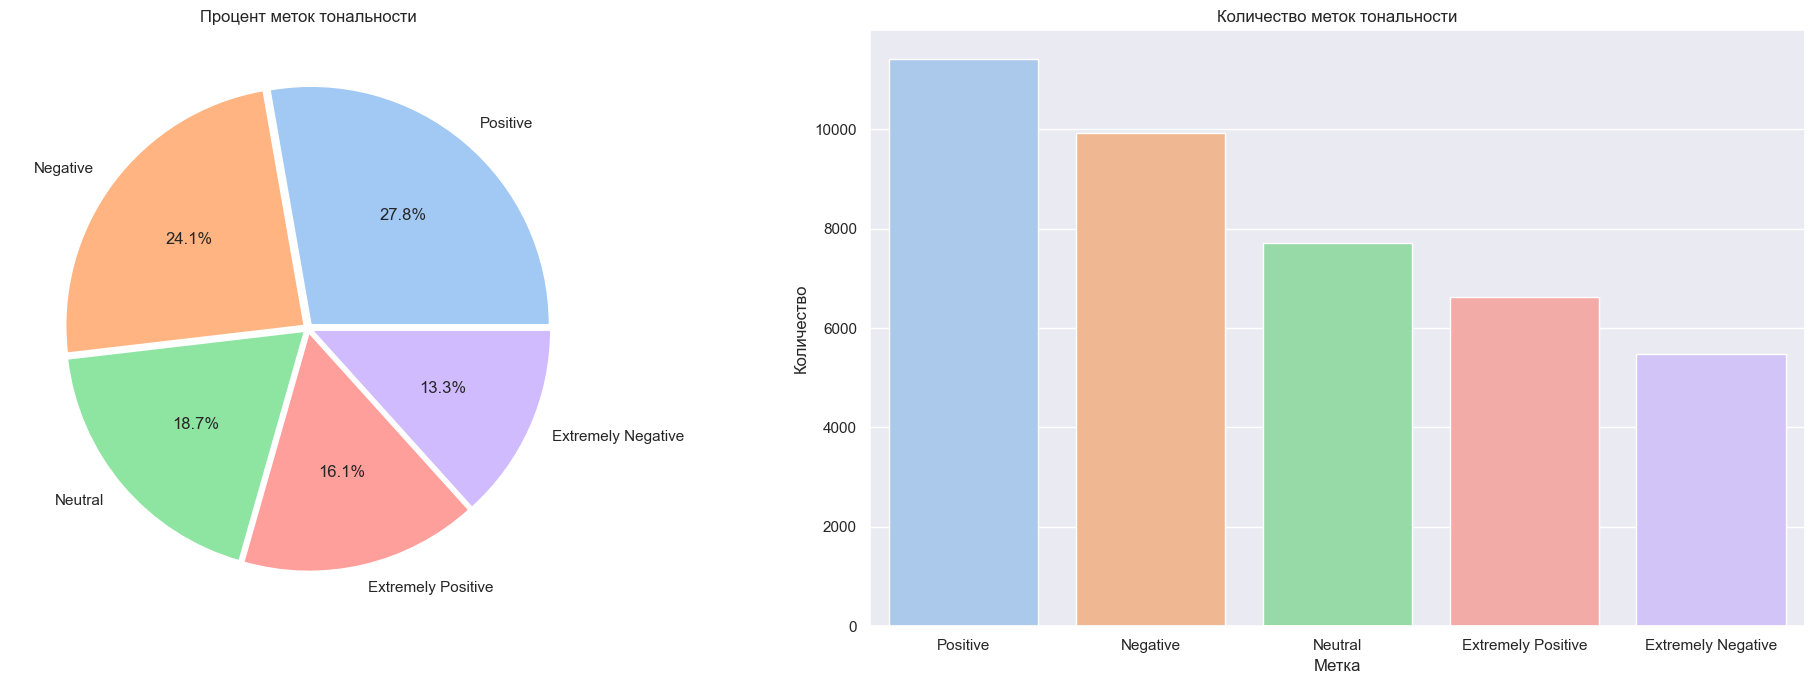

In [81]:
label_count = df['Sentiment'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Процент меток тональности')

sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Количество меток тональности')
axes[1].set_xlabel('Метка')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

### Подсчет длины сообщений

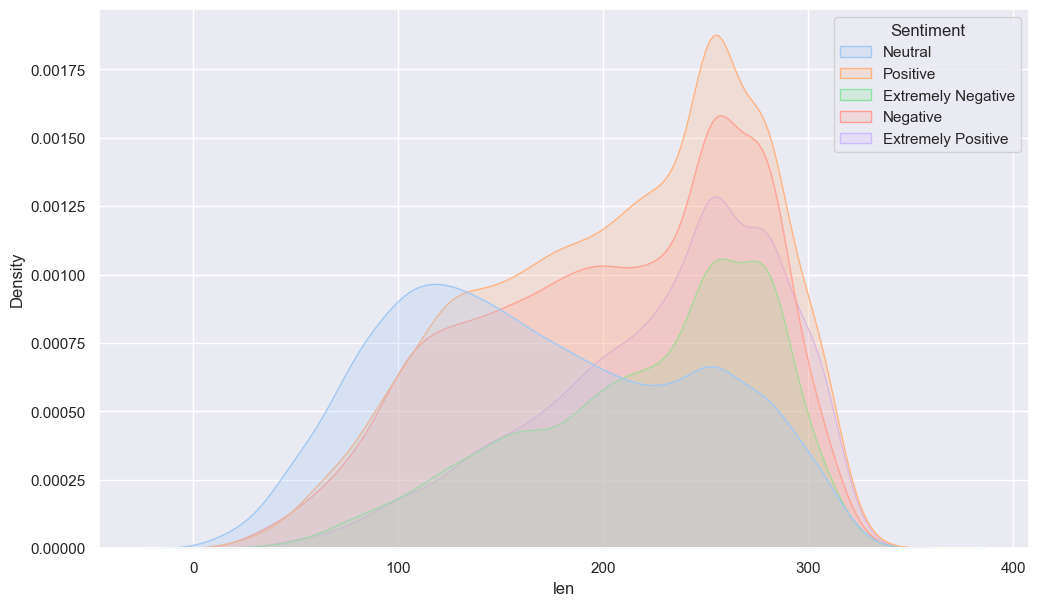

In [82]:
df['len'] = df['OriginalTweet'].apply(len)

plt.figure(figsize=(12, 7))
sns.kdeplot(df, x='len', fill=True, hue='Sentiment')
plt.show()

### BoW, Bag of Words, Мешок слов

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df['OriginalTweet'])

In [84]:
matrix

<41157x80424 sparse matrix of type '<class 'numpy.int64'>'
	with 1149620 stored elements in Compressed Sparse Row format>

In [85]:
matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [86]:
cv.get_feature_names_out()[29820:29830]

array(['garyleff', 'garylineker', 'garyvee', 'gas', 'gas_prices',
       'gasbuddy', 'gasbuddyguy', 'gaseous', 'gases', 'gaslighting'],
      dtype=object)

In [87]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [88]:
word_matrix

,00,000,0000,0000009375,0000hrs,000162,00042,000cr,000francs,000ksh,...,zzxwzxhc2v,zzz,zzzz,zâ,zã,zã¼rich,â²,ã¼berweist,ã¼cretsiz,ã¼retime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Часто встречающиеся слова

In [89]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]

In [90]:
bow = pd.DataFrame(bow, columns=['Frequncy'])

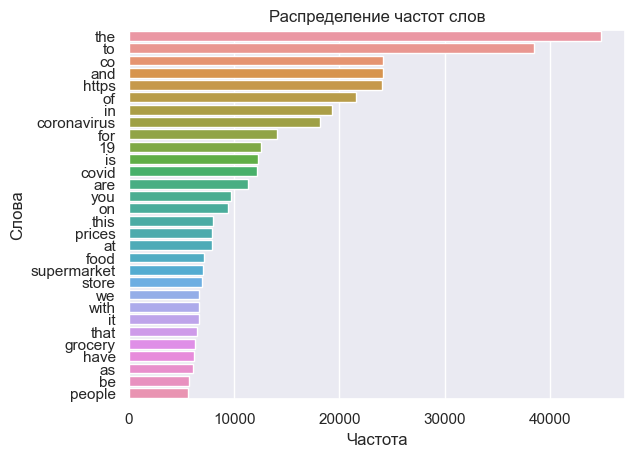

In [91]:
sns.barplot(x=bow['Frequncy'], y=bow.index)
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Распределение частот слов')
plt.show()

### Очистка данных

In [92]:
import string
import nltk
import re
nltk.download('punkt')

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic.\S+", "", text)
    text = re.sub(r"[^a-z'A-Z]", " ", text)
    text = re.sub(r"\s+ [a-z'A-Z]\s+", " ", text+ " ")
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
df['new_text'] = df['OriginalTweet'].apply(clean_text)

In [94]:
df.head()

,OriginalTweet,Sentiment,len,new_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...


In [95]:
df['Sentiment'].iloc[89]

'Extremely Positive'

In [96]:
df['OriginalTweet'].iloc[89]

'The fact that canned food, toxic chemicals and store bought hand sanitizers are out of stock, yet fresh fruit, vegetables and herbs are FULLY stocked, shows that humans have no idea how the immune system works.\r\r\n#QuarantineLife #COVID2019'

### Стемминг

In [97]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df['new_text'].iloc[1])
for w in words:
    print(w, ':', ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [99]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df['new_text'].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df['Stemmed'] = stemmed

In [100]:
df

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,[]
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,"[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...,"[readi, supermarket, covid, outbreak, paranoid..."
...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,102,airline pilots offering stock supermarket shel...,"[airlin, pilot, offer, stock, supermarket, she..."
41153,Response to complaint not provided citing COVI...,Extremely Negative,138,response complaint provided citing covid relat...,"[respons, complaint, provid, cite, covid, rela..."
41154,You know itÂs getting tough when @KameronWild...,Positive,136,know getting tough rationing toilet paper coro...,"[know, get, tough, ration, toilet, paper, coro..."
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,111,wrong smell hand sanitizer starting turn coron...,"[wrong, smell, hand, sanit, start, turn, coron..."


In [101]:
df['Stemmed'] = df['Stemmed'].apply(' '. join)
df.sample(10)

,OriginalTweet,Sentiment,len,new_text,Stemmed
35412,Coronavirus Stimulus Fraud May Be A Target For...,Negative,89,coronavirus stimulus fraud may target state ag...,coronaviru stimulu fraud may target state ag law
13267,"COVID-19, has just over 1,372 cases in the UK,...",Extremely Negative,255,covid cases deaths cancer around new cases eve...,covid case death cancer around new case everi ...
549,Happening across the country right now..... #c...,Neutral,132,happening across country right coronapocolypse...,happen across countri right coronapocolyps cor...
28422,Heading to the supermarket on a Saturday in Ap...,Positive,192,heading supermarket saturday april like carona...,head supermarket saturday april like caronavir...
12528,Guess who s profiting from the Amid the uncert...,Negative,169,guess profiting amid uncertainty sheep farmers...,guess profit amid uncertainti sheep farmer gai...
25664,IÂm calling on @GC_CUNY to continue to pay it...,Negative,205,calling continue pay food service provider cam...,call continu pay food servic provid campu food...
31916,The recommends wearing face coverings in publi...,Negative,176,recommends wearing face coverings public setti...,recommend wear face cover public set may diffi...
31067,@BashirAhmaad @NCDCgov How can lab help to che...,Negative,226,lab help check spread coronavirus kill person ...,lab help check spread coronaviru kill person t...
22539,Just seen this in @MetroUK and thought it was ...,Positive,235,seen thought funny coronavirushumor funny toil...,seen thought funni coronavirushumor funni toil...
18481,These were the only beans I could find at the ...,Neutral,166,beans could find grocery store sure cook well ...,bean could find groceri store sure cook well r...


### Классификация

### Наивный Байес

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df['Stemmed']
y, class_names = pd.factorize(df['Sentiment'], sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

pipe_1 = Pipeline([('vecorizer', TfidfVectorizer()),
('classifire', MultinomialNB(alpha=0.005))
])

pipe_1.fit(X_train, y_train)

y_pred = pipe_1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.4238338192419825
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.32      0.39      1096
Extremely Positive       0.48      0.30      0.37      1325
          Negative       0.38      0.47      0.42      1983
           Neutral       0.56      0.34      0.42      1543
          Positive       0.39      0.56      0.46      2285

          accuracy                           0.42      8232
         macro avg       0.46      0.40      0.41      8232
      weighted avg       0.45      0.42      0.42      8232



### Логистическая регрессия

In [107]:
from sklearn.linear_model import LogisticRegression
pipe_2 = Pipeline([('vecorizer', TfidfVectorizer()),
('classifire', LogisticRegression())
])

pipe_2.fit(X_train, y_train)

y_pred = pipe_2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.5829689018464529
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.50      0.56      1096
Extremely Positive       0.70      0.56      0.62      1325
          Negative       0.51      0.52      0.51      1983
           Neutral       0.65      0.67      0.66      1543
          Positive       0.53      0.63      0.58      2285

          accuracy                           0.58      8232
         macro avg       0.61      0.58      0.59      8232
      weighted avg       0.59      0.58      0.58      8232



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
